In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pylab as plt
import scipy.optimize as op

# =========== Part 1: Loading and Visualizing Data =============

Loading and Visualizing Data ...


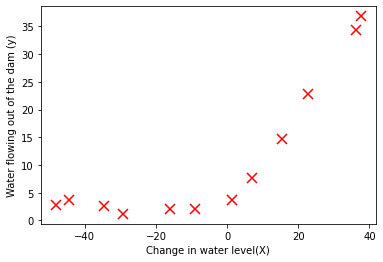

In [2]:
print('Loading and Visualizing Data ...')

# Load from ex5data1: 
# You will have X, y, Xval, yval, Xtest, ytest in your environment
data = sio.loadmat('./ex5/ex5data1.mat');
X = data['X'][:, 0]
Y = data['y'][:, 0]

Xtest = data['Xtest'][:, 0]
Ytest = data['ytest'][:, 0]
Xval = data['Xval'][:, 0]
Yval = data['yval'][:, 0]

# m = Number of examples
m = np.size(X, 0);
plt.plot(X, Y, 'rx', ms=10, mew=1.5)
plt.xlabel('Change in water level(X)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

# =========== Part 2: Regularized Linear Regression Cost =============

In [3]:
def lineRegCostFunc(theta, x, y, lamb):
    m = np.size(y, 0)
    j = 1 / (2 * m) * ((x.dot(theta) - y).T.dot(x.dot(theta) - y) + lamb * (theta[1:].dot(theta[1:])))
    return j

In [4]:
# You should now implement the cost function for regularized linear regression. 
theta = np.array([1, 1])

J = lineRegCostFunc(theta, np.c_[np.ones(m,), X], Y, 1)

print('Cost at theta = [1 ; 1]: %f (this value should be about 303.993192)\n' % J)

Cost at theta = [1 ; 1]: 303.993192 (this value should be about 303.993192)



# =========== Part 3: Regularized Linear Regression Gradient =============

In [5]:
def lineRegGradFunc(theta, x, y, lamb):
    print(x[:, 0])
    m = np.size(y, 0)
    grad = np.zeros(np.shape(theta))
    grad[0] = 1 / m * (x.dot(theta) - y).dot(x[:, 0])
    grad[1:] = 1/m*(x[:, 1:]).T.dot(x.dot(theta)-y)+lamb/m*theta[1:]
    return grad

In [6]:
grad = lineRegGradFunc(theta, np.c_[np.ones(m,), X], Y,  1)

print('Gradient at theta = [1 ; 1]:  [%f; %f] (this value should be about [-15.303016; 598.250744])' % (grad[0],grad[1]))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] (this value should be about [-15.303016; 598.250744])


# =========== Part 4: Train Linear Regression =============

In [7]:
def trainLineReg(x, y, lamb):
    init_theta = np.zeros(np.size(x, 1),)
    theta = op.fmin_cg(lineRegCostFunc, init_theta, fprime=lineRegGradFunc, maxiter=200, args=(x, y, lamb))
    return theta

In [8]:
# Train linear regression with lambda = 0
lamb = 0;
theta = trainLineReg(np.c_[np.ones(m, ), X], Y, lamb);

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


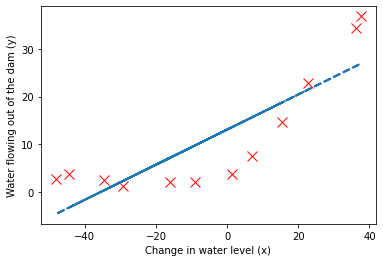

In [9]:
# Plot fit over the data
plt.plot(X, Y, 'rx', ms = 10, lw = 1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.c_[np.ones(m, ), X].dot(theta), '--', lw = 2)

# =========== Part 5: Learning Curve for Linear Regression =============

In [10]:
def learningCurve(x, y, xval, yval, lamb):
    m = np.size(x, 0)
    err_train = np.zeros((m,))
    err_val = np.zeros((m,))
    for i in range(m):
        theta = trainLineReg(x[0:i+1, :], y[0:i+1], lamb)
        err_train[i] = lineRegCostFunc(theta, x[0: i+1, :], y[0:i+1], 0)
        err_val[i] = lineRegCostFunc(theta, xval, yval, 0)
    return err_train, err_val

[1.]
[1.]
[1.]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
Optimization terminated successfully.
         Current function val

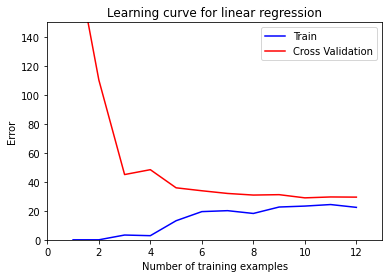

In [11]:
mval = np.size(Xval, 0)
error_train, error_val = learningCurve(np.c_[np.ones(m,), X], Y, np.c_[np.ones(mval,), Xval], Yval, lamb)

plt.plot(np.arange(m) + 1, error_train, 'b-', label='Train');
plt.plot(np.arange(m) + 1, error_val, 'r-', label='Cross Validation')
plt.title('Learning curve for linear regression')
plt.legend(loc='upper right')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error\n');
for i in range(m):
    print('  \t%d\t\t%f\t%f\n' % (i, error_train[i], error_val[i]));

# =========== Part 6: Feature Mapping for Polynomial Regression =============

In [12]:
def polyFeature(x, p):
    m = np.size(x, 0)
    x_poly = np.zeros((m, p))
    for i in range(p):
        x_poly[:, i] = np.power(x, i+1)
    return x_poly
def featureNormalize(x):
    mu = np.mean(x, 0)
    sigma = np.std(x, 0, ddof=1)
    x_norm = (x - mu) / sigma
    return x_norm, mu, sigma

In [13]:
p = 8
X_p = polyFeature(X, p)
X_p, mu, sigma = featureNormalize(X_p)
print(m)
X_poly = np.c_[np.ones((m,1)), X_p]

ltest = np.size(Xtest, 0)
X_p_test = polyFeature(Xtest, p)
X_p_test = (X_p_test - mu) / sigma
X_poly_test = np.c_[np.ones((ltest, 1)), X_p_test]

lval = np.size(Xval, 0)
X_v_test = polyFeature(Xval, p)
X_v_test = (X_v_test - mu)/sigma
X_poly_val = np.c_[np.ones((lval, 1)), X_v_test]

print('Normalized Training Example 1: \n', X_poly[0, :])

12
Normalized Training Example 1: 
 [ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]


# =========== Part 7: Learning Curve for Polynomial Regression =============

In [ ]:
def plotFit(min_x, max_x, mu, sigma, p):
    x = np.arange(min_x - 15, max_x + 15, 0.05)
    x_p = polyFeature(x, p)
    x_p = (x_p - mu)/sigma
    l = np.size(x_p, 0)
    x_poly = np.c_[np.ones((l, 1)), x_p]
    return x, x_poly.dot(theta)

lamb = 0
theta =  trainLineReg(X_poly, Y, lamb)

x_simu, y_simu = plotFit(np.min(X), np.max(X), mu, sigma, p)
fig1 = plt.figure(1)
ax = fig1.add_subplot(111)
ax.plot(X, Y, 'rx', ms=10, mew=1.5)
ax.plot(x_simu, y_simu, '--', lw=2)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')
fig1.suptitle('Polynomial Regression Fit (lambda = 0)')

In [ ]:
err_train, err_val = learningCurve(X_poly, Y, X_poly_val, Yval, lamb)
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111)
ax2.plot(np.arange(m)+1, err_train, 'b', label='Train')
ax2.plot(np.arange(m)+1, err_val, 'r', label='Cross Validation')
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('Error')
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2, labels2)
ax2.set_xlim([0, 13])
ax2.set_ylim([0, 100])
fig2.suptitle('PPolynomial Regression Learning Curve (lambda = 0)')
plt.show()
print('Polynomial Regression (lambda = 0)')
print('Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, err_train[i], err_val[i]))

# =========== Part 8: Validation for Selecting Lambda =============

In [20]:
def validationCurve(x, y, xval, yval):
    lamb_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    err_train = np.zeros((len(lamb_vec,)))
    err_val = np.zeros((len(lamb_vec,)))

    for i in range(len(lamb_vec)):
        lamb = lamb_vec[i]
        theta = trainLineReg(x, y, lamb)
        err_train[i] = linRegCostFunc(theta, x, y, 0)
        err_val[i] = linRegCostFunc(theta, xval, yval, 0)

    return lamb_vec, err_train, err_val

lambda_vec, err_train, err_val = validationCurve(X_poly, Y, X_poly_val, Yval)
plt.plot(lambda_vec, err_train, 'b', label='Train')
plt.plot(lambda_vec, err_val, 'r', label='Cross Validation')
plt.xlabel('lambda')
plt.ylabel('Error')
plt.legend(loc='upper right')
plt.show()

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], err_train[i], err_val[i]))

NameError: name 'trainLinReg' is not defined